<a href="https://colab.research.google.com/github/andi23/Custlr-AI/blob/Zobaid_branch/Recommendation_System/netflix_movies_and_shows_plotly_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
'''Import basic modules.'''
import pandas as pd
import numpy as np


'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [3]:
df = pd.read_csv('../content/gdrive/My Drive/Colab Notebooks/netflix-shows/netflix_titles.csv')
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

show_id     type  ... month_added season_count
0  81145628    Movie  ...         9.0             
1  80117401    Movie  ...         9.0             
2  70234439  TV Show  ...         9.0            1
3  80058654  TV Show  ...         9.0            1
4  80125979    Movie  ...         9.0             

[5 rows x 15 columns]

# 2. TITLE

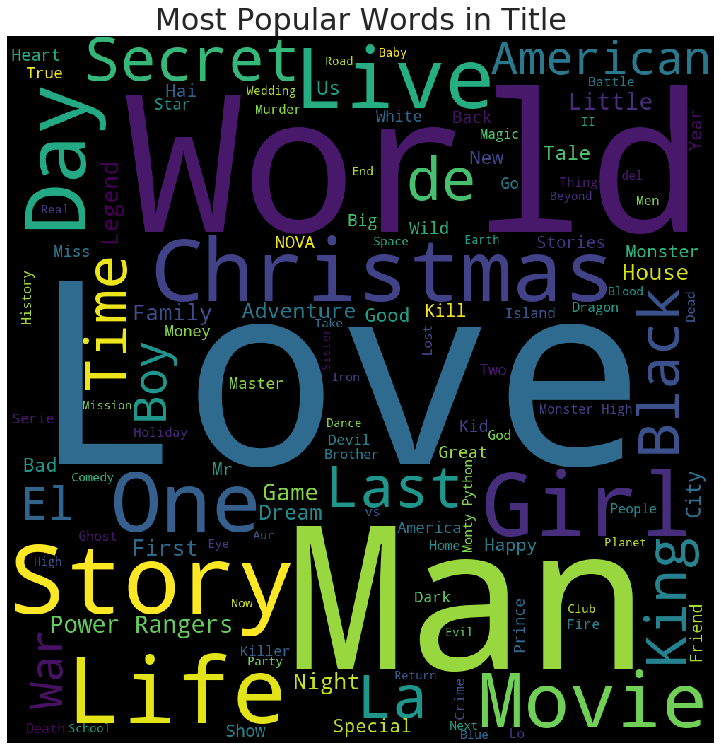

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

# 3. MOVIES AND TV SHOWS

In [5]:
'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**NETFLIX HAVE MORE MOVIES THAN TV SHOWS**")
py.iplot([pie_plot(df['type'].value_counts(), ['cyan', 'gold'], 'Content Type')])

**NETFLIX HAVE MORE MOVIES THAN TV SHOWS**

In [6]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

As we know, <font color="red">Netflix</font> works with content providers, distributors, producers, and creators to acquire licensing for TV shows and movies to stream on our service. so, the data shows <font color="red">Netflix</font> purchasing and inversting more in movies licenses for the customers.

# 4. RATING & CONTENT TYPE

In [7]:
temp_df = df['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'MOST OF PROGRAMME ON NEYFLIX IS TV-14 & TV-MA RATED' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

py.iplot([pie_plot(df['rating'].value_counts(), 'Content Type')])

In [8]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['rating'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY CONTENT TYPE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [10]:
!pip install squarify

**MOST POPULAR GENRES ON NETFILX ARE:**

**DOCUMENTARIES,COMEDIES, DRAMAS, INTERNATIONAL, ACTION**

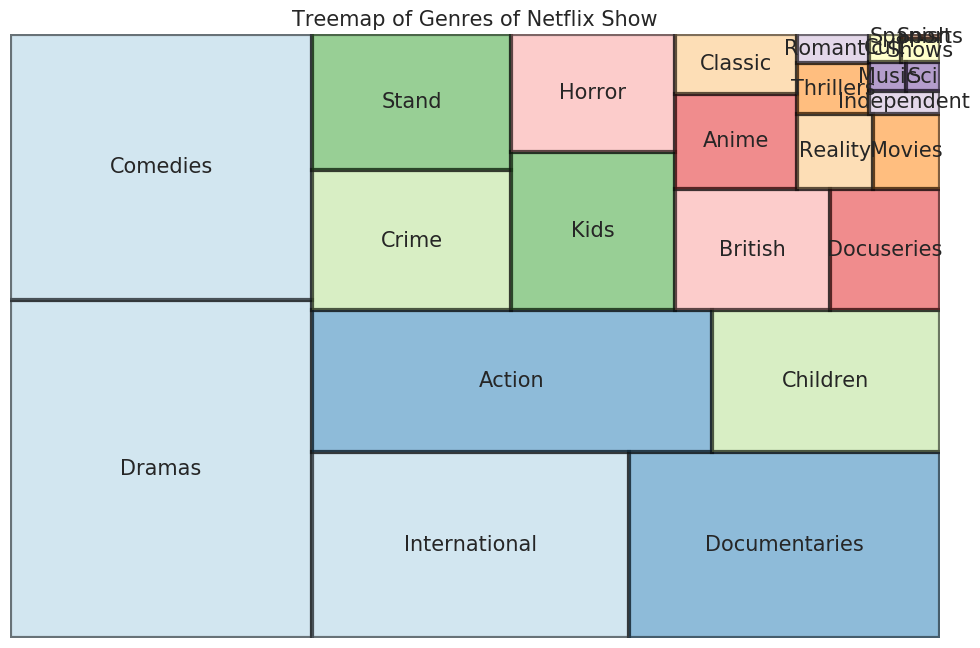

In [11]:
bold('**MOST POPULAR GENRES ON NETFILX ARE:**')
bold('**DOCUMENTARIES,COMEDIES, DRAMAS, INTERNATIONAL, ACTION**')
import squarify
df['Genres'] = df['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
temp_df = df['Genres'].value_counts().reset_index()

sizes=np.array(temp_df['Genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':15})
plt.title('Treemap of Genres of Netflix Show', fontsize = 15)
plt.axis('off')
plt.show()

<font color="royalblue">Netflix is more focusing on dramas, comedies, Documentries, international and action type of content.</font>

### CORRELATION WITHIN THE CATEGORIES(GENRES)
Source: 
* [Visualising stocks correlations with Networkx](https://towardsdatascience.com/visualising-stocks-correlations-with-networkx-88f2ee25362e)
* https://www.kaggle.com/subinium/road-to-viz-expert-1-unusual-tools

**HEATMAP(Correlation)**

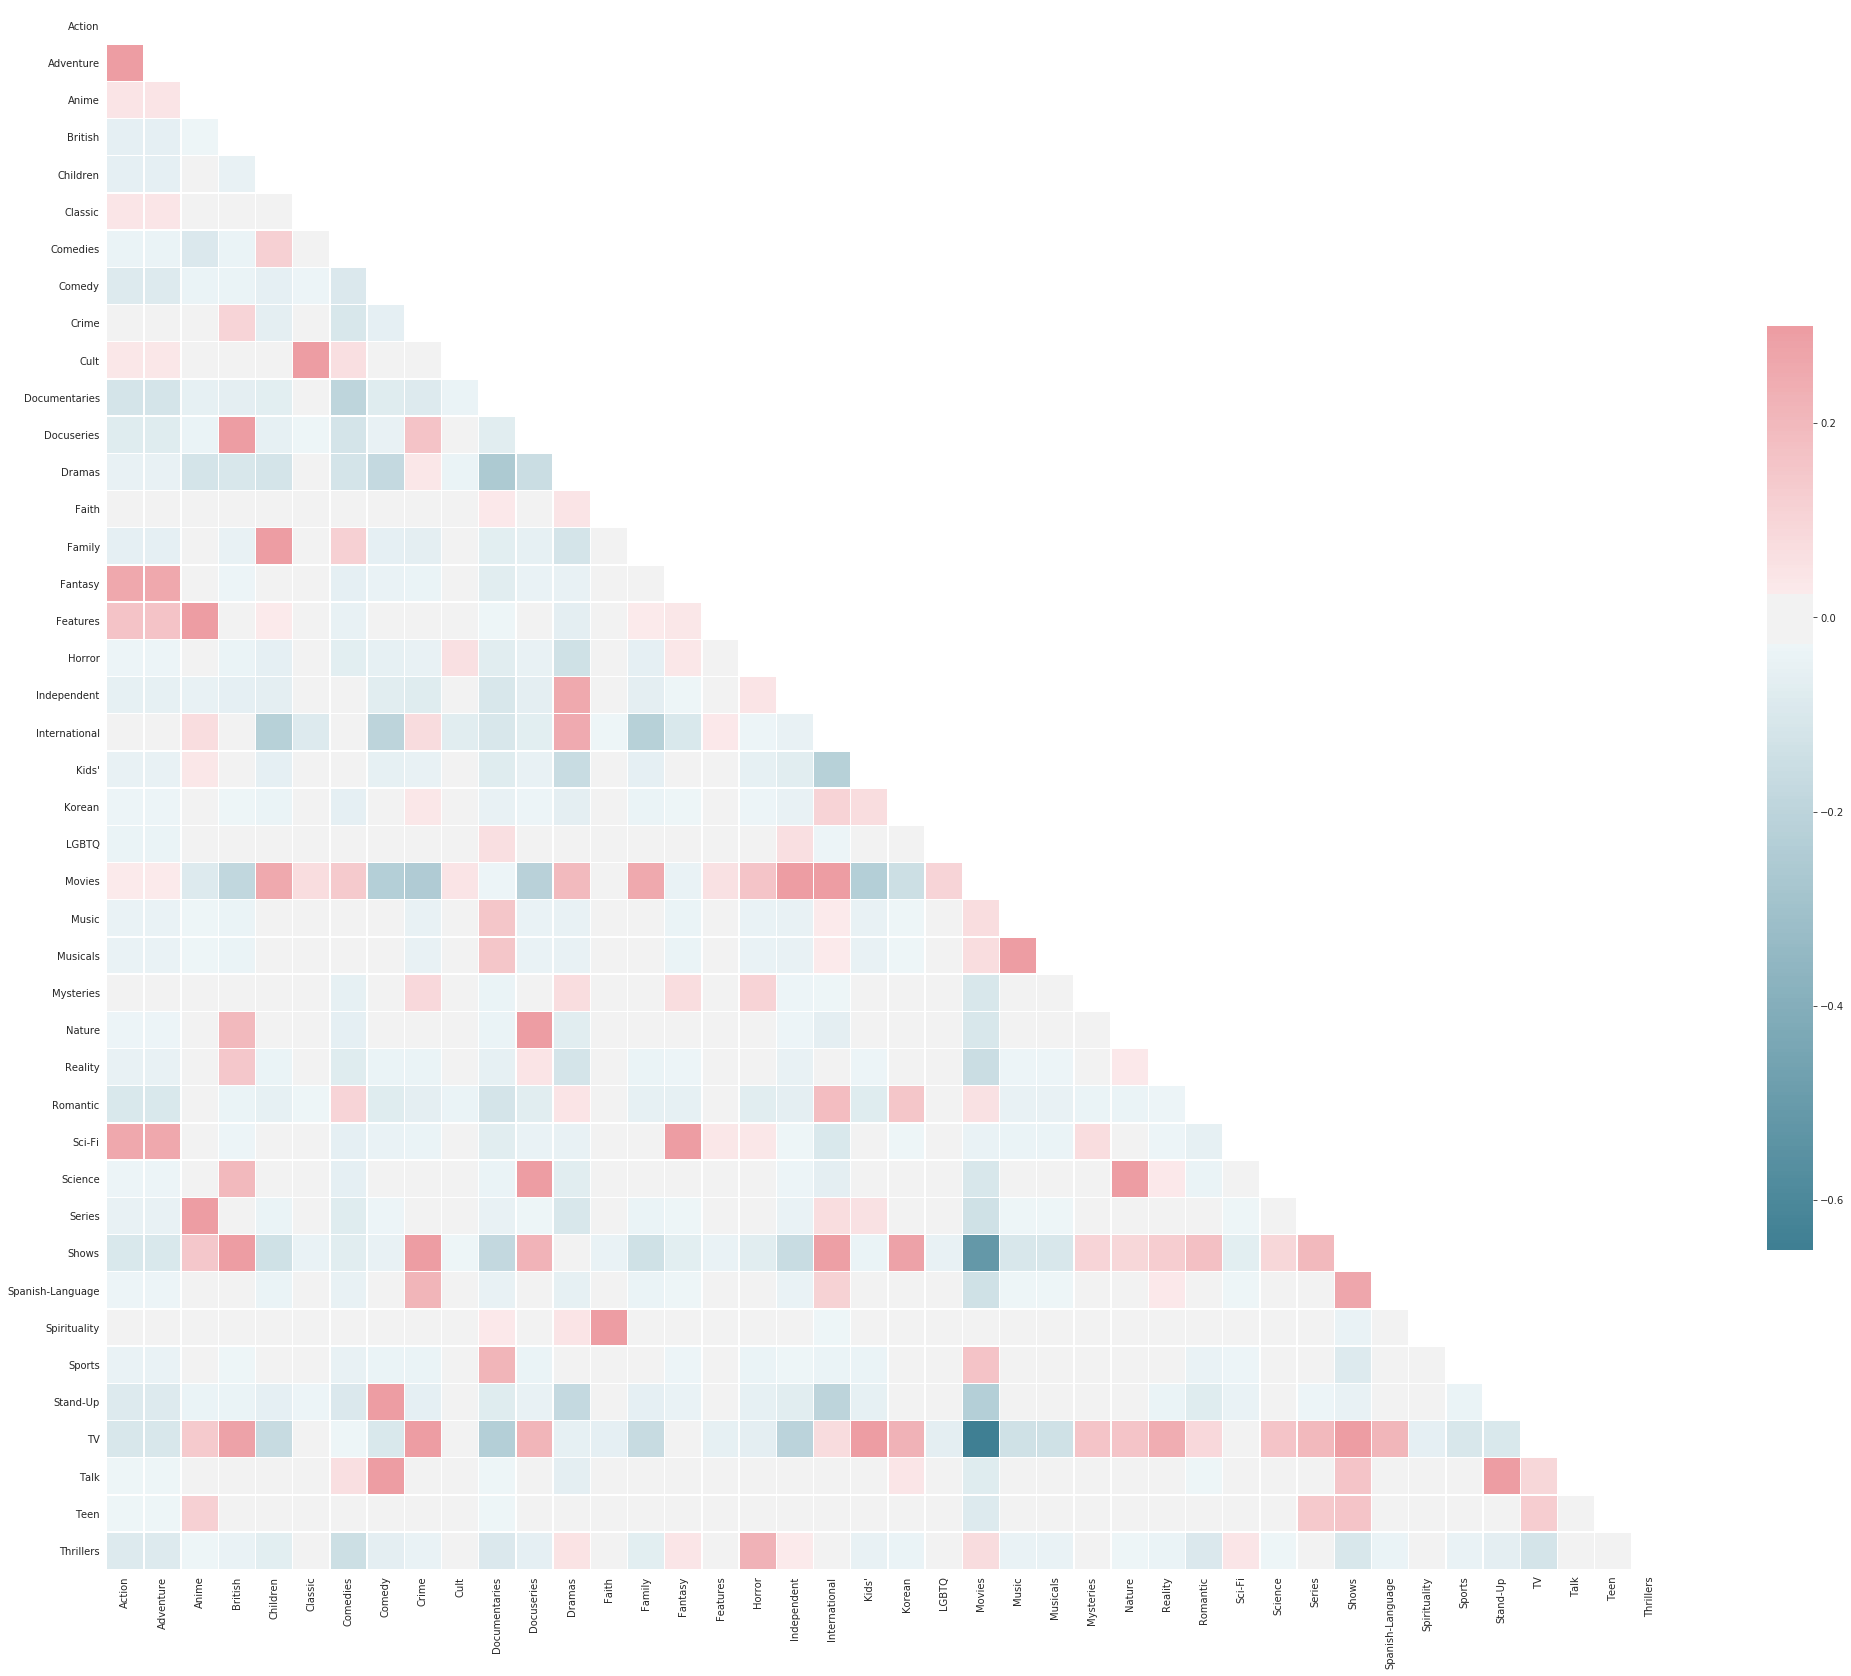

In [12]:
bold('**HEATMAP(Correlation)**')
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

data= df['listed_in'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split()) 

test = data
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 34))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

**NETWORKX (Correlation)**

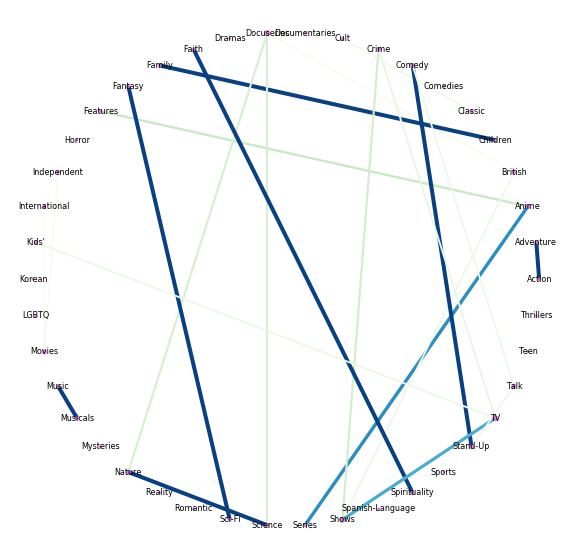

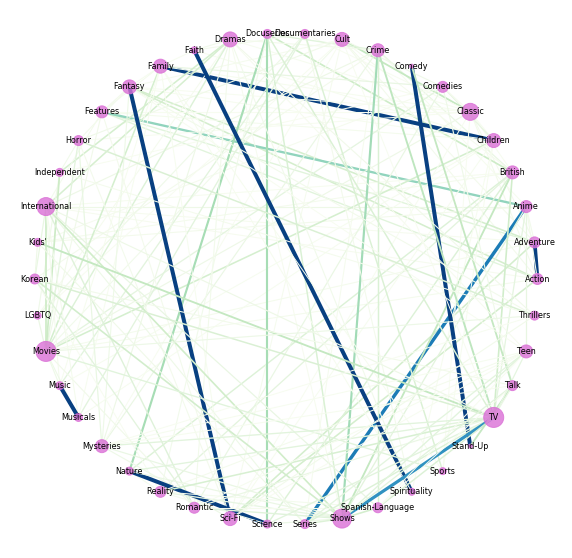

In [13]:
bold('**NETWORKX (Correlation)**')
import networkx as nx

stocks = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)

def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)
    
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 
    
create_corr_network(G, 'positive', 0.3)
create_corr_network(G, 'positive', -0.3)

# 5. RELEASE YEAR, DURATION, SEASON 

In [14]:
temp_df1 = df['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [15]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

Above plot is show deduce that <font color="red">Netflix</font> start realeasing more content from 2000 and It is showing inceasing trend over the year in the TV show as well as in the movies. These are rough estimates based on a list published by Netflix of more than 850 titles that are streamed exclusively on Netflix, including originals and first-run titles that the company syndicates and premieres in some of its markets, as of Dec. 31, 2018. Netflix also released more than 10,100 minutes of original documentaries, about 8,500 minutes of movies, 4,800 minutes of kids programming, and 3,600 minutes of stand-up comedy.

In [16]:
trace = go.Histogram(
                     x = df['duration'],
                     xbins=dict(size=0.5),
                     marker = dict(color = 'rgb(26, 118, 255)'))
layout = go.Layout(template= "plotly_dark", title = 'Distribution of Movies Duration', xaxis = dict(title = 'Minutes'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

**GREY'S ANATOMY AND NCIS HAVE HIGHEST NO. OF SEASON ON NETFLIX**

title director  ...        country release_year
5908  Grey's Anatomy      NaN  ...  United States         2018
5974            NCIS      NaN  ...  United States         2017

[2 rows x 5 columns]

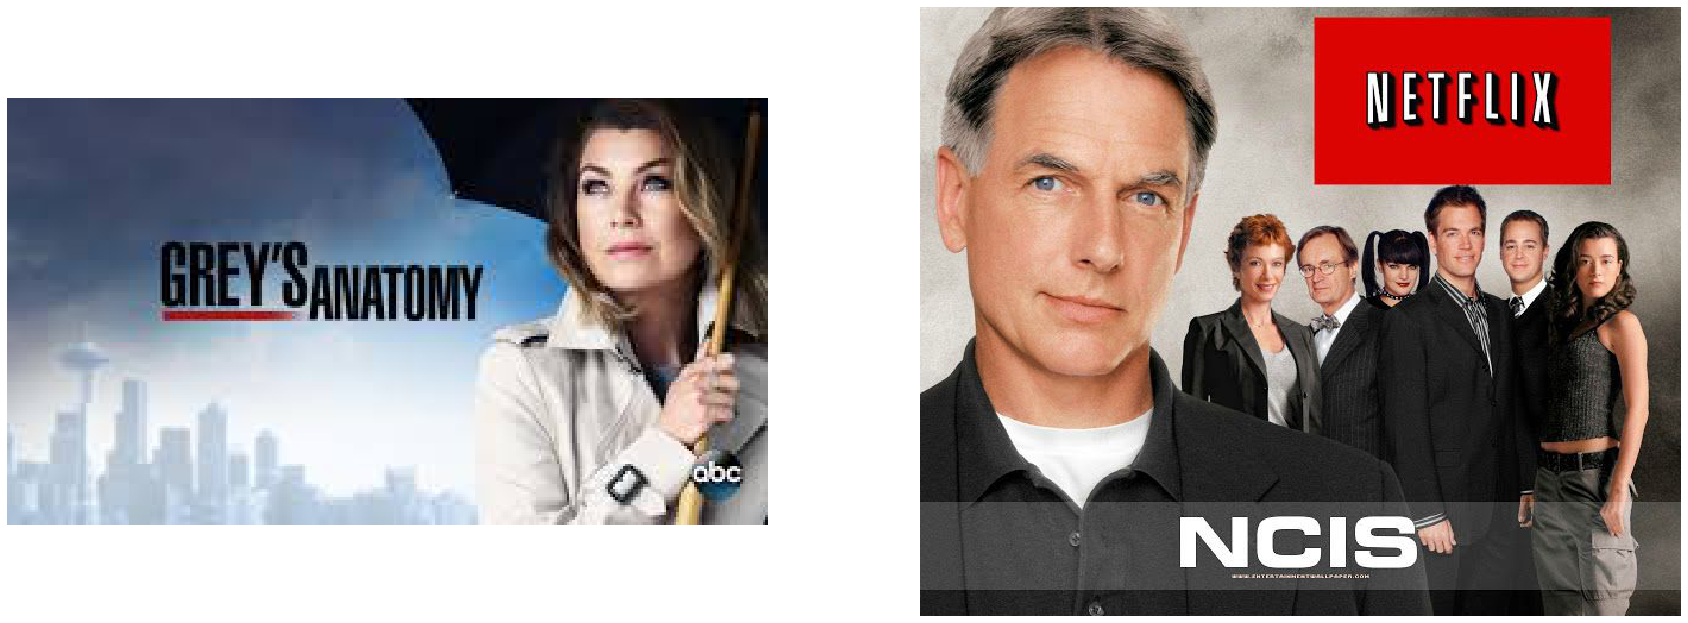

In [17]:
bold("**GREY'S ANATOMY AND NCIS HAVE HIGHEST NO. OF SEASON ON NETFLIX**")
display(df[df['season_count'] == '15'][['title','director', 'cast','country','release_year']])

# image
import urllib.request
from PIL import Image

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0A6upRBYwNBw68tempa18gIxAliLNWkv60-X-fbgQ6rgQOGwC&s'))
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://i.pinimg.com/originals/58/dc/ba/58dcba558659a13a843c489fa29146f2.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

# plot
trace = go.Histogram(
                     x = df['season_count'],
                     marker = dict(color = 'rgb(249, 6, 6)'))
layout = go.Layout(template= "plotly_dark", title = 'Seasons of TV Shows', xaxis = dict(title = 'No. of Seasons'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

<font color="royalblue">Grey's Anatomy</font> is an American medical drama television series that premiered on March 27, 2005, on the American Broadcasting Company (ABC) as a mid-season replacement. The fictional series focuses on the lives of surgical interns, residents, and attending doctors, as they develop into seasoned doctors while trying to maintain personal lives and relationships.Grey's Anatomy was renewed for a sixteenth season which premiered on September 26, 2019. The series' success catapulted such long-running cast members as Pompeo, Dempsey, Chambers, Capshaw and Oh to worldwide recognition; they were among the top five highest-earning television actors in 2013.

<font color="royalblue">NCIS</font> is an American action police procedural television series, revolving around a fictional team of special agents from the Naval Criminal Investigative Service. The concept and characters were initially introduced in two episodes of the CBS series JAG (season eight episodes 20 and 21: "Ice Queen" and "Meltdown"). The show, a spin-off from JAG, premiered on September 23, 2003, on CBS. To date it has aired sixteen full seasons and has gone into broadcast syndication on the USA Network. Donald P. Bellisario and Don McGill are co-creators and executive producers of the premiere member of the NCIS franchise. As of 2019, it is the second-longest-running scripted, non-animated U.S. primetime TV series currently airing, surpassed only by Law & Order: Special Victims Unit (1999–present), and is the 7th-longest-running scripted U.S. primetime TV series overall.

**OLDEST MOVIES ON NETFLIX**

title  ...                        country
2011                                    Prelude to War  ...                  United States
2013                              The Battle of Midway  ...                  United States
2022     Undercover: How to Operate Behind Enemy Lines  ...                  United States
2023                Why We Fight: The Battle of Russia  ...                  United States
2026                   WWII: Report from the Aleutians  ...                  United States
2017  The Memphis Belle: A Story of a\nFlying Fortress  ...                  United States
2019                                 The Negro Soldier  ...                  United States
2021                                  Tunisian Victory  ...  United States, United Kingdom
2012                                        San Pietro  ...                  United States
2009                          Nazi Concentration Camps  ...                  United States

[10 rows x 4 columns]

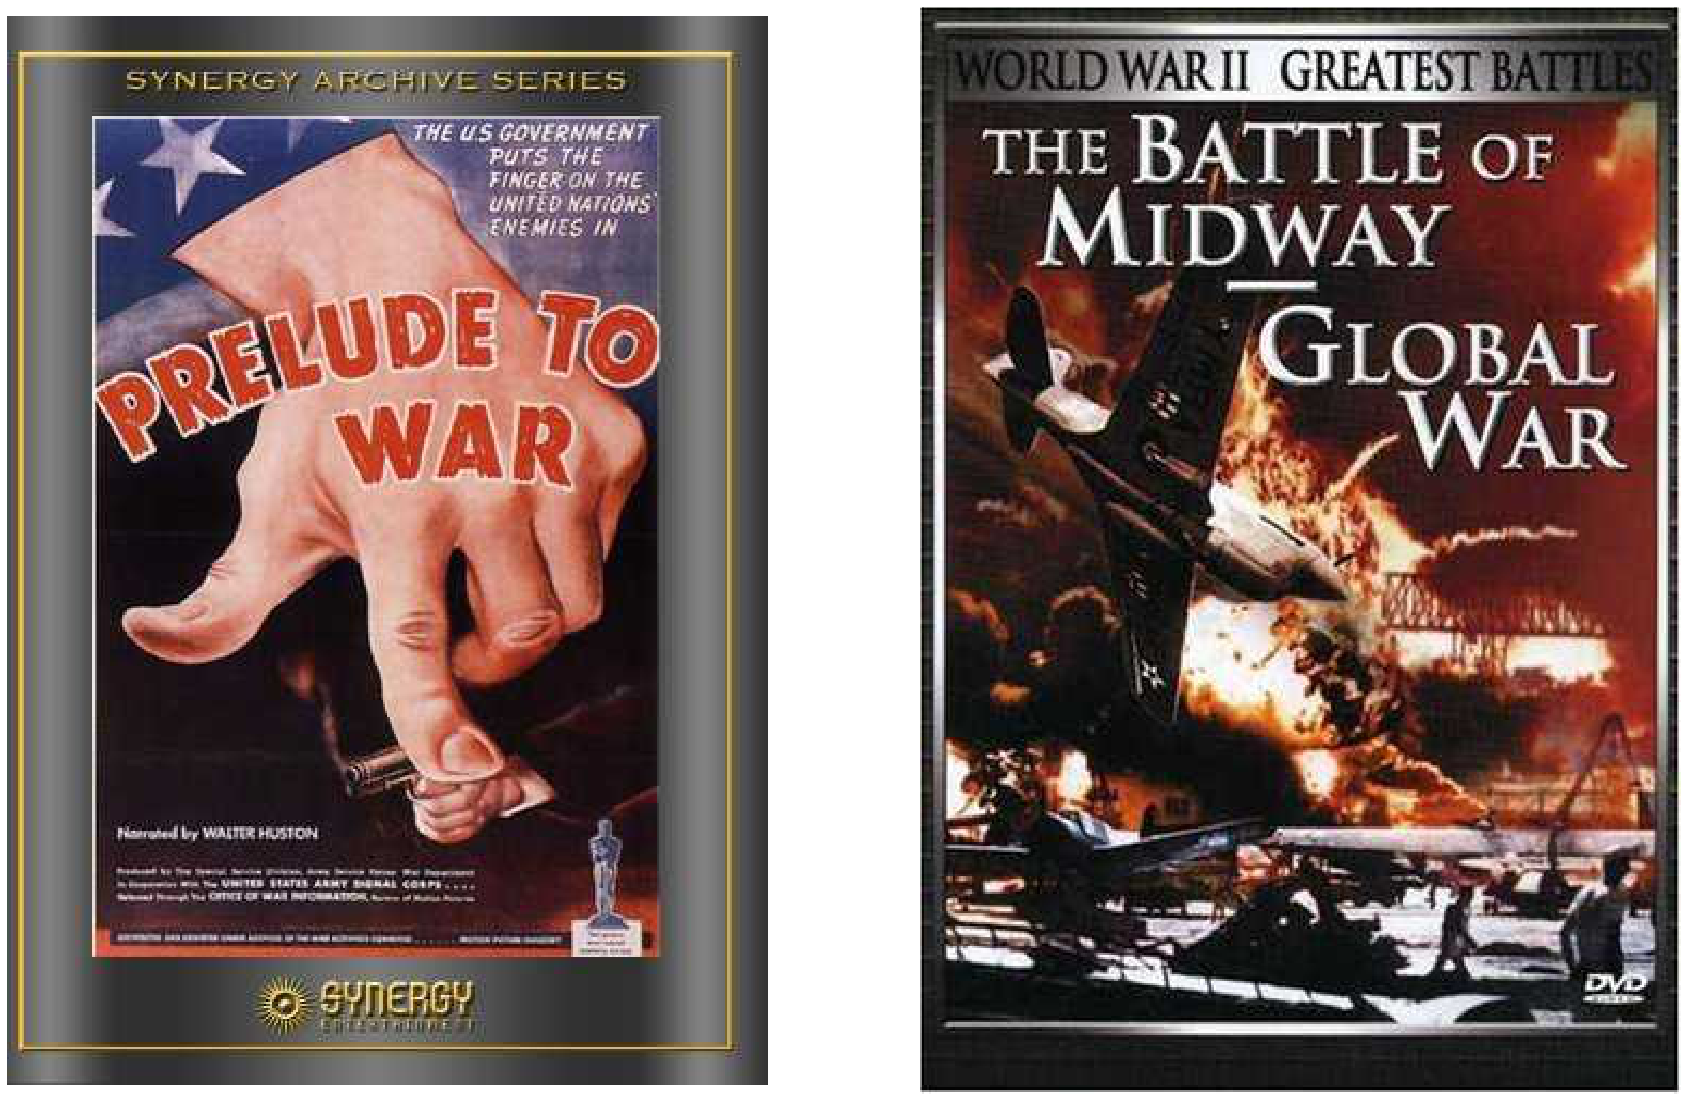

In [18]:
bold('**OLDEST MOVIES ON NETFLIX**')
oldest = df.sort_values("release_year", ascending = True)
oldest = oldest[oldest['duration'] != ""]
display(oldest[['title', "release_year", 'listed_in','country']][:10])

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://m.media-amazon.com/images/M/MV5BMTY3NTMyMDQ4NF5BMl5BanBnXkFtZTgwMjkzODgwMzE@._V1_QL50_.jpg'))
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://m.media-amazon.com/images/M/MV5BMTY3Njg3MDUxMl5BMl5BanBnXkFtZTcwMzE4MTU1MQ@@._V1_QL50_.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

<font color="royalblue">Prelude to War (1942)</font> is the first film of Frank Capra's Why We Fight film series, commissioned by the Office of War Information (OWI) and George C. Marshall. It was made to educate American troops of the necessity of combating the Axis Powers during World War II. The film was based on the idea that those in the service would be more willing and able fighters if they knew the background and reason for their participation in the war. It was later released to the general American public as a rallying cry for support of the war.

<font color="royalblue">The Battle of Midway (1942)</font> was a decisive naval battle in the Pacific Theater of World War II that took place between 4 and 7 June 1942, six months after Japan's attack on Pearl Harbor and one month after the Battle of the Coral Sea.The United States Navy under Admirals Chester W. Nimitz, Frank J. Fletcher, and Raymond A. Spruance defeated an attacking fleet of the Imperial Japanese Navy under Admirals Isoroku Yamamoto, Chūichi Nagumo, and Nobutake Kondō near Midway Atoll, inflicting devastating damage on the Japanese fleet that proved irreparable.

**OLDEST TV SHOW ON NETFLIX**

title  ...                       country
4292    Pioneers: First Women Filmmakers*  ...                           NaN
4079  Pioneers of African-American Cinema  ...                 United States
5981  The Twilight Zone (Original Series)  ...                 United States
5980               The Andy Griffith Show  ...                 United States
5704                            Star Trek  ...                 United States
614      Monty Python's Fliegender Zirkus  ...  United Kingdom, West Germany
5669         Monty Python's Flying Circus  ...                United Kingdom
5830                           Dad's Army  ...                United Kingdom
4273                             El Chavo  ...                        Mexico
4369                        Ninja Hattori  ...                         Japan

[10 rows x 4 columns]

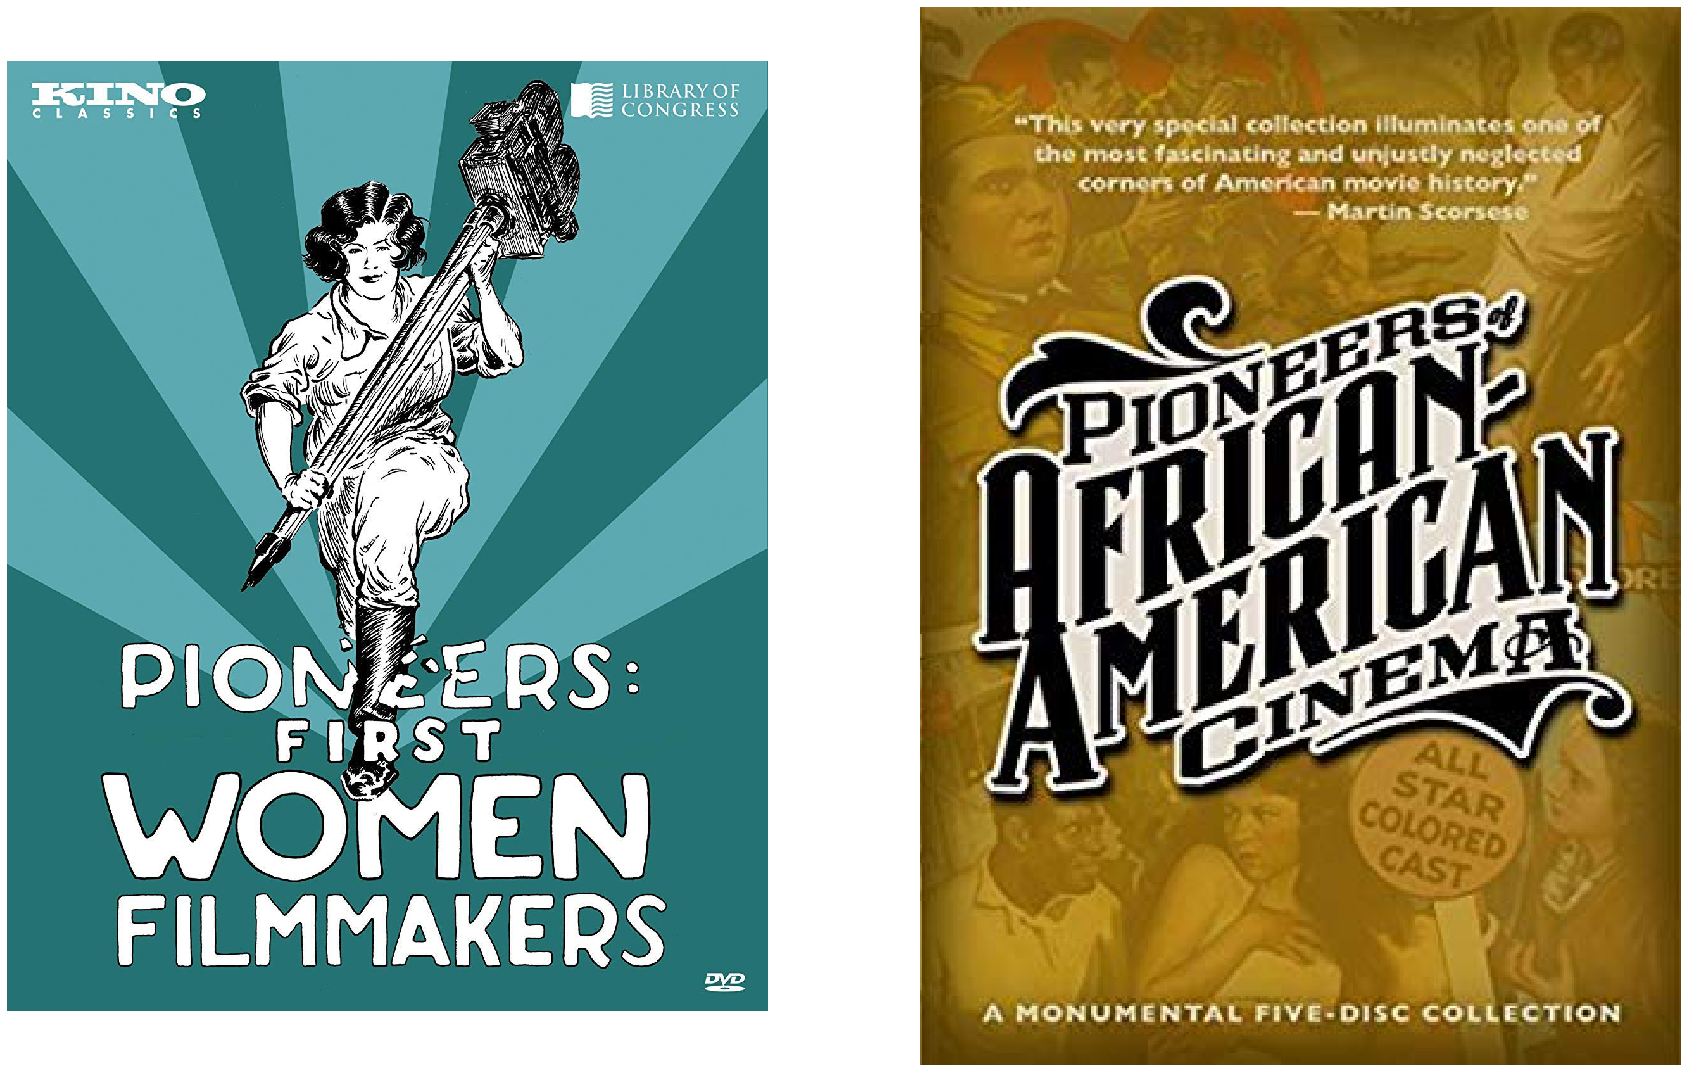

In [19]:
bold('**OLDEST TV SHOW ON NETFLIX**')
oldest = df.sort_values("release_year", ascending = True)
oldest = oldest[oldest['season_count'] != ""]
display(oldest[['title', "release_year", 'listed_in','country']][:10])

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://images-na.ssl-images-amazon.com/images/I/71ddmI5x94L._SL1500_.jpg'))
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://images-na.ssl-images-amazon.com/images/I/51KqZA%2B42OL._SY445_.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

**Source:** www.kinolorber.com

<font color="royalblue">Pioneers: First Women Filmmakers</font> **Crew** Directed by Alice Guy-Blaché, Lois Weber, Helen Holmes, Mabel Normand, Grace Cunard and Dorothy Davenport Reid

In the Wild West days of early filmmaking—before Hollywood hardened into an assembly-line behemoth and boys’ club—talented women worked regularly as writers, producers, and directors, instrumental in shaping the very language of cinema as we know it. Nevertheless, figures like Alice Guy Blaché and Lois Weber are known today primarily by aficionados, and artists like Nell Shipman, Grace Cunard, and Marion E. Wong remain woefully obscure. Bringing together dozens of essential new restorations, this series spotlights the daring, innovative, and trailblazing work of the first female filmmakers and restores their centrality to the creation of cinema itself. – BAMCinematek
Box set out November 2018. Produced in collaboration with the Library of Congress.

<font color="royalblue">Pioneers of African-American Cinema</font> **Crew** Directed by Richard Norman, Richard Maurice, Spencer Williams and Oscar Micheaux

This collection of the works of America's legendary first African-American filmmakers is the only one of its kind. Funded in part by a highly successful Kickstarter campaign, the packaged set includes no fewer than a dozen feature-length films and nearly twice as many shorts and rare fragments. Subject matter includes race issues that went unaddressed by Hollywood for decades. 

# 6. COUNTRY, CAST, DIRECTOR

In [20]:
temp_df = df['country'].value_counts().reset_index()[:20]


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['country'],
                marker = dict(color = 'rgb(153,255,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 20 COUNTIES WITH MOST CONTENT' , xaxis = dict(title = 'Countries'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

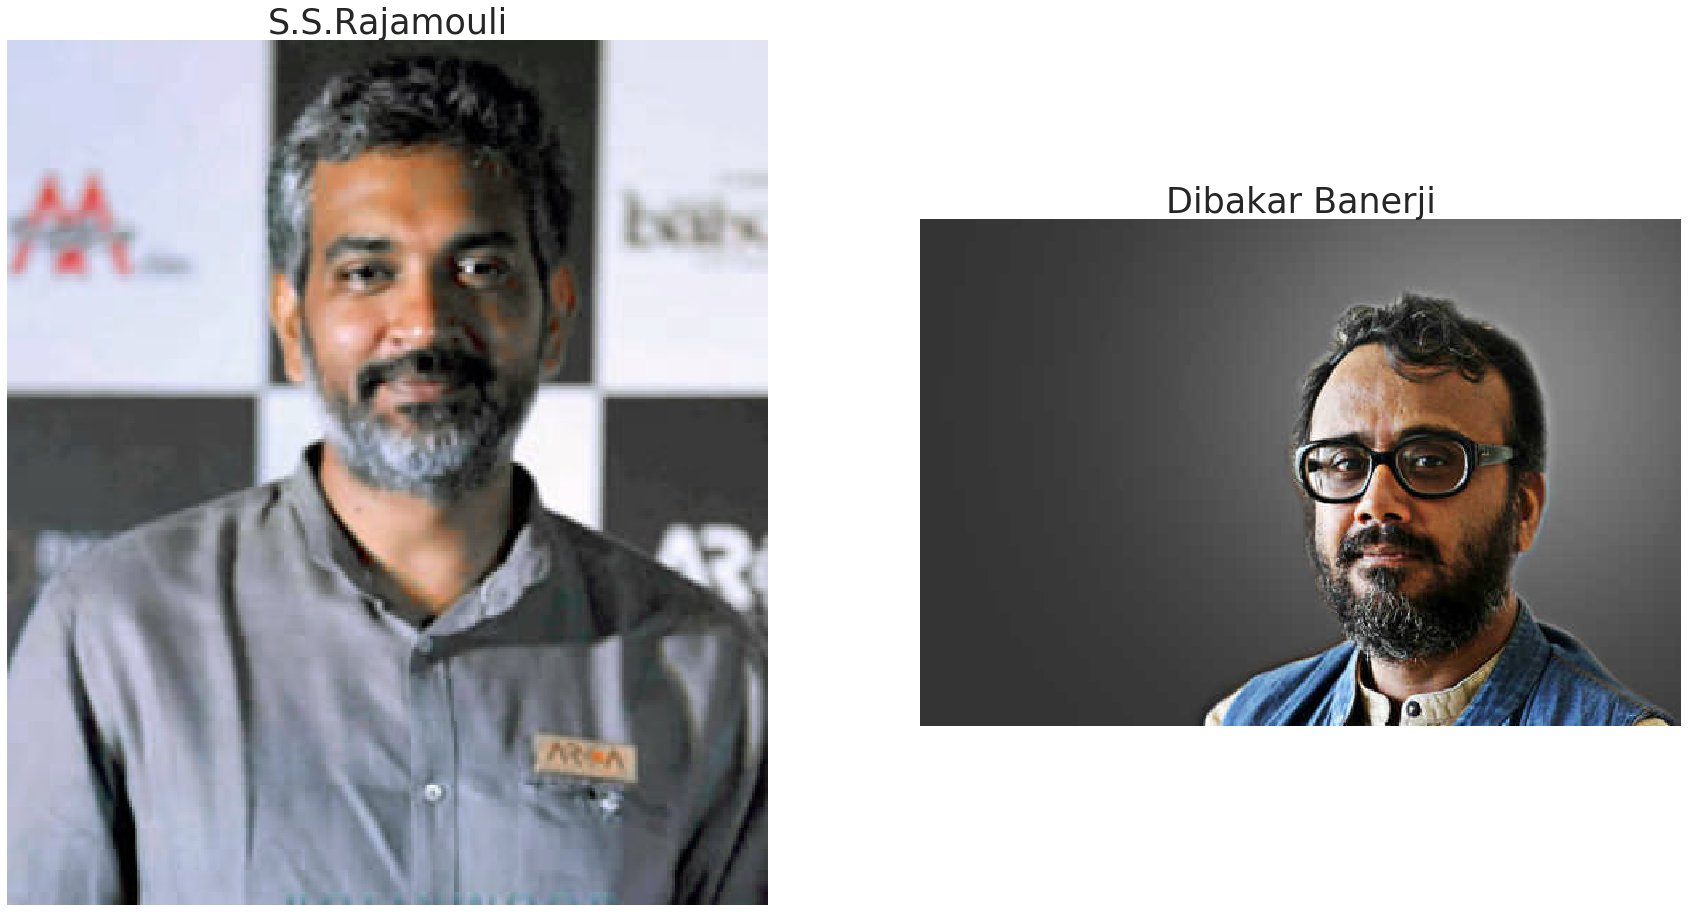

In [21]:
from collections import Counter

temp_df = df[df['type']=='Movie']
temp_df = temp_df[temp_df['country']=='India']

categories = ", ".join(temp_df['director'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = 'rgb(51,255,255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 MOVIES DIRECTORS FROM INDIA WITH MOST CONTENT' , xaxis = dict(title = 'Directors'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://upload.wikimedia.org/wikipedia/commons/7/7f/S._S._Rajamouli_at_the_trailer_launch_of_Baahubali.jpg'))
plt.title('S.S.Rajamouli', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://i2.cinestaan.com/image-bank/640-360/45001-46000/45877.jpg'))
plt.title('Dibakar Banerji', fontsize=35)
plt.imshow(image)
plt.axis('off')
plt.show()

<font color="royalblue">Koduri Srisaila Sri Rajamouli</font>, professionally known as S. S. Rajamouli, is an Indian film director, and screenwriter known for his works predominantly in the Telugu cinema.He is known for directing high fantasy works such as Magadheera (2009), Eega (2012), Baahubali: The Beginning (2015), and Baahubali 2: The Conclusion (2017) which received the American Saturn Award for Best International Film, and the Australian Telstra People's Choice Award.

<font color="royalblue">Dibakar Banerjee</font> (born 21 June 1969) is an Indian film director, screenwriter, producer and advertisement-filmmaker known for his work in Hindi films. He also runs his own film production company, Dibakar Banerjee Productions. As a film maker, he is known for Khosla Ka Ghosla (2006), Oye Lucky! Lucky Oye! (2008), both of which won National Film Awards.His next film was the experimental Love Sex Aur Dhokha (2010). It was followed by the political drama Shanghai (2012) and Bombay Talkies (2013), which was made as a celebration of the centenary year of Indian cinema.

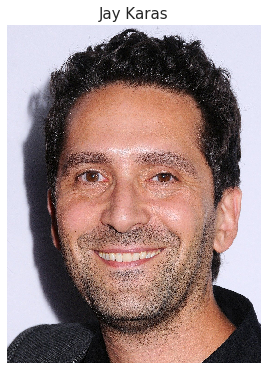

In [22]:
temp_df = df[df['type']=='Movie']
temp_df = temp_df[temp_df['country']=='United States']

categories = ", ".join(temp_df['director'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = 'rgb(255,51,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 MOVIES DIRECTORS FROM U.S. WITH MOST CONTENT' , xaxis = dict(title = 'Directors'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

plt.subplots(figsize=(10,20))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='http://www.gstatic.com/tv/thumb/persons/530202/530202_v9_ba.jpg'))
plt.title('Jay Karas', fontsize=15)
plt.imshow(image)
plt.axis('off')
plt.show()

<font color="royalblue">Jay Karas</font> directs both comedy and drama, in a variety of mediums: hours and half hours, commercials, stand-up specials, and feature films. Jay has directed numerous other half hours, including Brooklyn Nine Nine (FOX), Superstore (NBC), The Kids Are Alright, Splitting Up Together (ABC), Life In Pieces (CBS), Parks and Recreation (NBC), Workaholics (Comedy Central),  and Married (FX), and one hours including Siren, The Fosters, and the pilot Unstrung for Freeform, and Finding Carter for MTV.

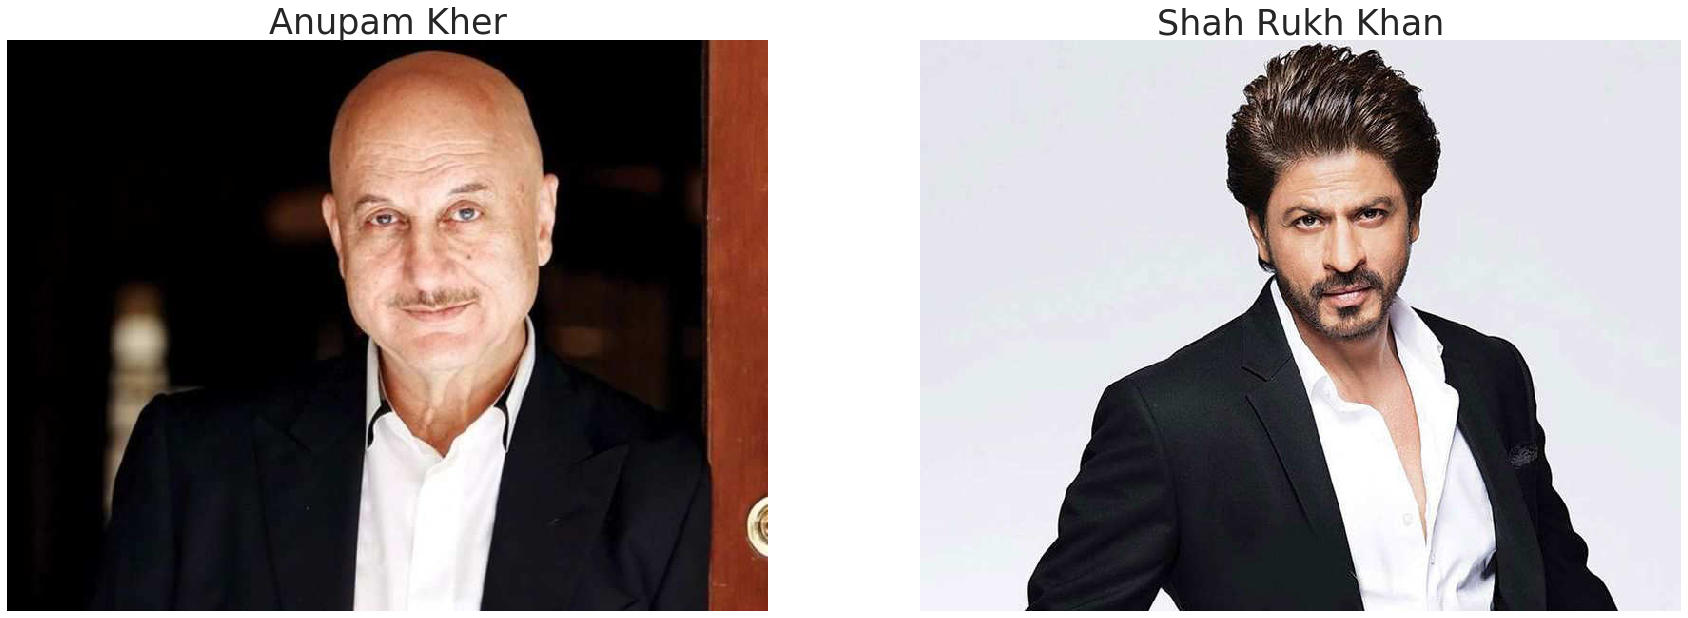

In [23]:
temp_df = df[df['type']=='Movie']
temp_df = temp_df[temp_df['country']=='India']

categories = ", ".join(temp_df['cast'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = 'rgb(51,255,255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 MOVIES ACTORS FROM INDIA WITH MOST CONTENT' , xaxis = dict(title = 'Actors'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://timesofindia.indiatimes.com/thumb/msid-67834646,imgsize-23733,width-800,height-600,resizemode-4/67834646.jpg'))
plt.title('Anupam Kher', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://timesofindia.indiatimes.com/thumb/msid-69340156,width-800,height-600,resizemode-4/69340156.jpg'))
plt.title('Shah Rukh Khan', fontsize=35)
plt.imshow(image)
plt.axis('off')
plt.show()

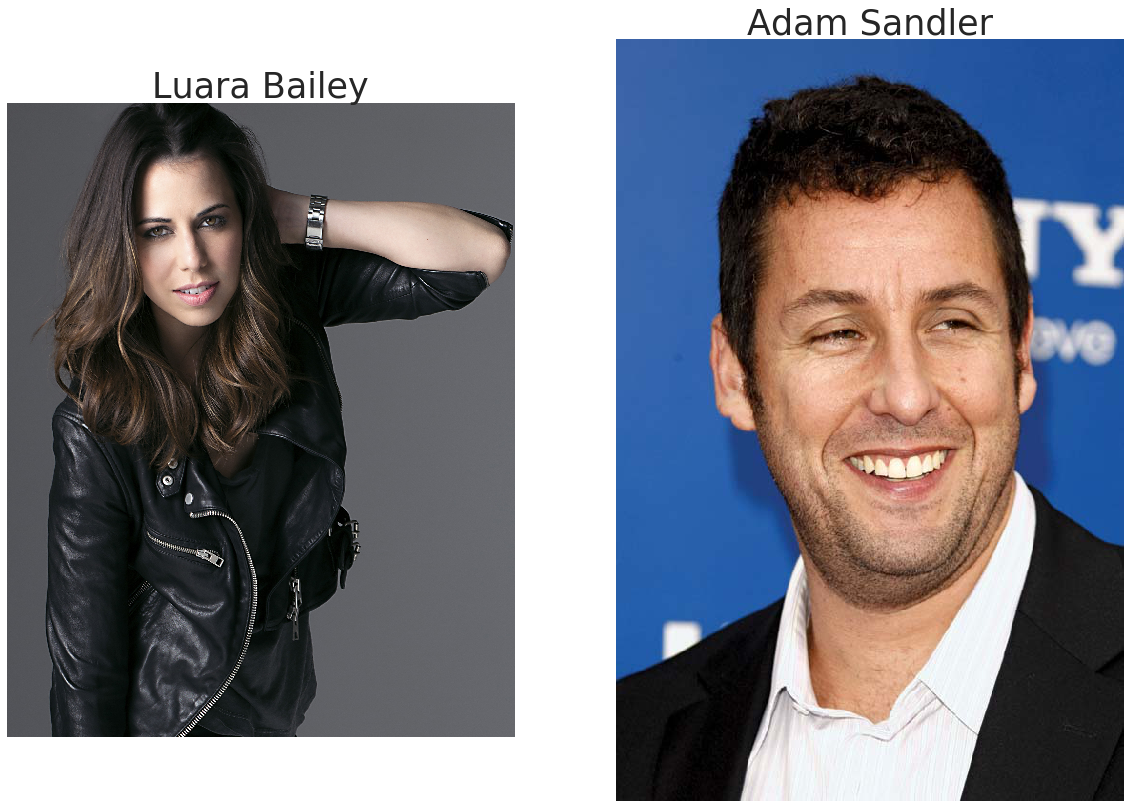

In [24]:
temp_df = df[df['type']=='Movie']
temp_df = temp_df[temp_df['country']=='United States']

categories = ", ".join(temp_df['cast'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = 'rgb(255,51,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 MOVIES ACTORS FROM U.S. WITH MOST CONTENT' , xaxis = dict(title = 'Actors'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

plt.subplots(figsize=(20,40))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://m.media-amazon.com/images/M/MV5BNTg0YTkxNGEtNjM2YS00NzYwLWIwMDktYmMzMzE0NTRiZDQwXkEyXkFqcGdeQXVyMjQwMDg0Ng@@._V1_.jpg'))
plt.title('Luara Bailey', fontsize=35)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://cdn.britannica.com/24/157824-050-D8E9E191/Adam-Sandler-2011.jpg'))
plt.title('Adam Sandler', fontsize=35)
plt.imshow(image)
plt.axis('off')
plt.show()

In [25]:
temp_df1 = df[df['type']=='TV Show']
temp_df1 = temp_df1[temp_df1['country']=='United States']
categories1 = ", ".join(temp_df1['director'].fillna("")).split(", ")
counter_list1 = Counter(categories1).most_common(11)
counter_list1 = [_ for _ in counter_list1 if _[0] != ""]
labels1 = [_[0] for _ in counter_list1][::-1]
values1 = [_[1] for _ in counter_list1][::-1]

temp_df2 = df[df['type']=='TV Show']
temp_df2 = temp_df2[temp_df2['country']=='India']
categories2 = ", ".join(temp_df2['director'].fillna("")).split(", ")
counter_list2 = Counter(categories2).most_common(11)
counter_list2 = [_ for _ in counter_list2 if _[0] != ""]
labels2 = [_[0] for _ in counter_list2][::-1]
values2 = [_[1] for _ in counter_list2][::-1]

from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,subplot_titles=("United States", "India"))

trace1 = go.Bar(
                x = labels1,
                y = values1,
                marker = dict(color = 'rgb(255,51,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5))
               )

trace2 = go.Bar(
                x = labels2,
                y = values2,
                marker = dict(color = 'rgb(51,255,255)',
                              line=dict(color='rgb(0,0,0)',width=1.5))
               
                )

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.update_layout(height=600, width=600,template= "plotly_dark",title_text = 'TOP 10 TV SHOW DIRECTORS MOST CONTENT')
fig.show()

In [26]:
temp_df1 = df[df['type']=='TV Show']
temp_df1 = temp_df1[temp_df1['country']=='United States']
categories1 = ", ".join(temp_df1['cast'].fillna("")).split(", ")
counter_list1 = Counter(categories1).most_common(11)
counter_list1 = [_ for _ in counter_list1 if _[0] != ""]
labels1 = [_[0] for _ in counter_list1][::-1]
values1 = [_[1] for _ in counter_list1][::-1]

temp_df2 = df[df['type']=='TV Show']
temp_df2 = temp_df2[temp_df2['country']=='India']
categories2 = ", ".join(temp_df2['cast'].fillna("")).split(", ")
counter_list2 = Counter(categories2).most_common(11)
counter_list2 = [_ for _ in counter_list2 if _[0] != ""]
labels2 = [_[0] for _ in counter_list2][::-1]
values2 = [_[1] for _ in counter_list2][::-1]

from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,subplot_titles=("United States", "India"))

trace1 = go.Bar(
                x = labels1,
                y = values1,
                marker = dict(color = 'rgb(255,51,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5))
               )
trace2 = go.Bar(
                x = labels2,
                y = values2,
                marker = dict(color = 'rgb(51,255,255)',
                              line=dict(color='rgb(0,0,0)',width=1.5))
               
                )

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.update_layout(height=600, width=600,template= "plotly_dark",title_text = 'TOP 10 TV SHOW ACTORS MOST CONTENT')
fig.show()

# 7. Content-Based Movie Recommender System

<img src="https://miro.medium.com/max/1026/1*BME1JjIlBEAI9BV5pOO5Mg.png" style="width: 200px;"/>

**I want my recommender to be based only on the title, movie director, cast, genre and description of movies, so these are the only columns I considered in the modeling.**

Source: [Build a content-based movie recommender system with Natural Language Processing](https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243)

In [40]:
new_df = df[['title','director','cast','listed_in','description']]
new_df.head()

title  ...                                        description
0  Norm of the North: King Sized Adventure  ...  Before planning an awesome wedding for his gra...
1               Jandino: Whatever it Takes  ...  Jandino Asporaat riffs on the challenges of ra...
2                       Transformers Prime  ...  With the help of three human allies, the Autob...
3         Transformers: Robots in Disguise  ...  When a prison ship crash unleashes hundreds of...
4                             #realityhigh  ...  When nerdy high schooler Dani finally attracts...

[5 rows x 5 columns]

## 7.1 Clean the data

In [37]:
!pip install rake-nltk
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
new_df.dropna(inplace=True)

blanks = []  # start with an empty list

col=['title','director','cast','listed_in','description']
for i,col in new_df.iterrows():  # iterate over the DataFrame
    if type(col)==str:            # avoid NaN values
        if col.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

new_df.drop(blanks, inplace=True)

In [0]:
# initializing the new column
new_df['Key_words'] = ""

for index, row in new_df.iterrows():
    description = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(description)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
new_df.drop(columns = ['description'], inplace = True)

In [0]:
# discarding the commas between the actors' full names and getting only the first three names
new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])

# putting the genres in a list of words
new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))

new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ''.join(row['director']).lower()

In [44]:
new_df.set_index('title', inplace = True)
new_df.head()

director  ...                                          Key_words
title                                                                  ...                                                   
Norm of the North: King Sized Adventure         richardfinn,timmaltby  ...  [polar, bear, king, must, take, back, grandfat...
#realityhigh                                          fernandolebrija  ...  [nerdy, high, schooler, dani, finally, attract...
Automata                                                   gabeibáñez  ...  [robot, killed, discovers, global, conspiracy,...
Fabrizio Copano: Solo pienso en mi       rodrigotoro,franciscoschultz  ...  [reflecting, stand, next, level, family, whats...
Good People                                           henrikrubengenz  ...  [find, struggling, couple, stash, believe, mon...

[5 rows x 4 columns]

In [0]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        if col != 'director':
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
new_df.drop(columns = [col for col in new_df.columns if col!= 'bag_of_words'], inplace = True)

In [46]:
new_df.head()

bag_of_words
title                                                                                     
Norm of the North: King Sized Adventure  richardfinn,timmaltby alanmarriott andrewtoth ...
#realityhigh                             fernandolebrija nestacooper katewalsh johnmich...
Automata                                 gabeibáñez antoniobanderas dylanmcdermott mela...
Fabrizio Copano: Solo pienso en mi       rodrigotoro,franciscoschultz fabriziocopano st...
Good People                              henrikrubengenz jamesfranco katehudson tomwilk...

## 7.2 Feature Extraction and Modeling

In [47]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['bag_of_words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
indices = pd.Series(new_df.index)
indices[:5]

0    Norm of the North: King Sized Adventure
1                               #realityhigh
2                                   Automata
3         Fabrizio Copano: Solo pienso en mi
4                                Good People
Name: title, dtype: object

In [48]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.04454354, 0.04166667, ..., 0.        , 0.        ,
        0.03450328],
       [0.04454354, 1.        , 0.        , ..., 0.        , 0.03253   ,
        0.03688556],
       [0.04166667, 0.        , 1.        , ..., 0.03311331, 0.03042903,
        0.03450328],
       ...,
       [0.        , 0.        , 0.03311331, ..., 1.        , 0.31437304,
        0.38388595],
       [0.        , 0.03253   , 0.03042903, ..., 0.31437304, 1.        ,
        0.32756921],
       [0.03450328, 0.03688556, 0.03450328, ..., 0.38388595, 0.32756921,
        1.        ]])

In [0]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(new_df.index)[i])
        
    return recommended_movies

In [50]:
recommendations('Rocky')

['Rocky III',
 'Rocky IV',
 'Rocky II',
 'Rocky V',
 "Logan's Run",
 'Indiana Jones and the Last Crusade',
 'Don',
 'Thong Dee Fun Khao',
 'Arjun: The Warrior Prince',
 'The Bleeder']

In [51]:
recommendations('War Horse')

["Schindler's List",
 'Planetarium',
 'God Bless the Broken Road',
 "The Butterfly's Dream",
 'My Honor Was Loyalty',
 'The Great Raid',
 'Harry and Snowman',
 'Mr. Church',
 'The Good Catholic',
 'Lincoln']

In [52]:
recommendations('3 Idiots')

['Moms at War',
 'Amar Akbar & Tony',
 'PK',
 'Pahuna',
 'Acapulco La vida va',
 'Hazaaron Khwaishein Aisi',
 'Dil Chahta Hai',
 'Kai Po Che!',
 'Barrio Universitario',
 '#Selfie 69']

In [0]:
recommendations('Bad Boys')

['Bad Boys II',
 'Kung Fu Yoga',
 'Merantau',
 'Bon Cop Bad Cop 2',
 'Men in Black II',
 'Hellboy',
 'The Do-Over',
 'Free Fire',
 'Once a Gangster',
 'Rampage: President Down']